In [7]:
from cells.layer_v_with_ais import SPI6
from neuron import h, gui
from helpers.record import *
import copy

# Model Creation

### 1. Generate model according to the Layout specified in cells

So far the Model is consistently the same as the Model provided by Neomytin et al (2017)
No AIS Inclusion yet. Parameters should workas expected

In [8]:
cell = SPI6()



### 2. Generate a Single Pulse Voltage Clamp at the Cell Soma

Record at the same spot

In [9]:
h.v_init = -75.0413649414 
singlepulse = h.IClamp(cell.soma(0.5))
singlepulse.delay = 20
singlepulse.dur = 2
singlepulse.amp = -1

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(cell.soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.tstop = 300.0
h.run()

0.0

In [10]:
parammaps = [{"delay":20*i,"dur":2 ,"amp": -i*2} for i in range(0,20)]
outputs = []

h.v_init = -75.0413649414 
for param in parammaps:
    cell = SPI6()
    singlepulse = h.IClamp(cell.soma(0.5))
    singlepulse.delay = param["delay"]
    singlepulse.dur = param["dur"]
    singlepulse.amp = param["amp"]

    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()             # Time stamp vector
    v_vec.record(cell.soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    h.tstop = 500.0
    h.run()
    outputs.append({"v": copy.copy(v_vec), "t": copy.copy(t_vec)})

# Plot Output of the Stimulation

It uses the standard properties of the NEURON Simulation, should be adapted to your spatial and time-resolution


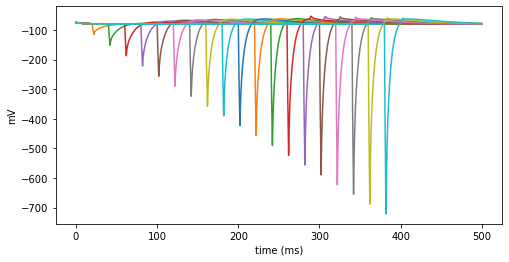

In [6]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
for el in outputs: 
    pyplot.plot(el["t"], el["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()

